In [ ]:
#Dataset : salary.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("salary.csv")

In [3]:
df.head()

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
#to check null value 
df.isnull().sum()

Unnamed: 0        0
age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 16 columns):
Unnamed: 0        1032 non-null int64
age               1032 non-null int64
Workclass         1032 non-null object
fnlwgt            1032 non-null int64
education         1032 non-null object
education-num     1032 non-null int64
marital-status    1032 non-null object
occupation        1032 non-null object
relationship      1032 non-null object
race              1032 non-null object
sex               1032 non-null object
capital-gain      1032 non-null int64
capital-loss      1032 non-null int64
hours-per-week    1032 non-null int64
native-country    1032 non-null object
Income            1032 non-null int64
dtypes: int64(8), object(8)
memory usage: 129.1+ KB


In [10]:
df.drop("Unnamed: 0",axis=1,inplace=True) #to delete columns Unnamed: 0 
#to delete permanently

In [11]:
df.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [12]:
df_cat=df.select_dtypes(object)

In [14]:
df_num=df.select_dtypes("int64")

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
for col in df_cat :
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [19]:
df_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


In [20]:
#concatenate (merge Numerical & categorical DataSet)
df_new=pd.concat([df_num,df_cat],axis=1)

In [21]:
df_new.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,77516,13,2174,0,40,0,5,9,4,0,1,4,1,28
1,50,83311,13,0,0,13,0,4,9,2,3,0,4,1,28
2,38,215646,9,0,0,40,0,2,11,0,5,1,4,1,28
3,53,234721,7,0,0,40,0,2,1,2,5,0,2,1,28
4,28,338409,13,0,0,40,0,2,9,2,9,5,2,0,4


In [22]:
#separate the input and output variable from df
X=df_new.drop("Income",axis=1) #input
Y=df_new["Income"] #output

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [24]:
def create_model(model):
    model.fit(X_train,Y_train) #train
    y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,y_pred))
    return model

In [25]:
from sklearn.metrics import classification_report

In [ ]:
#BaseLine Model : Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
#create object of LogisticRegression
lr=LogisticRegression()

In [28]:
#call function
create_model(lr)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.68      0.26      0.38        72

    accuracy                           0.80       310
   macro avg       0.75      0.61      0.63       310
weighted avg       0.78      0.80      0.76       310



LogisticRegression()

In [49]:
lr.fit(X_train,Y_train) #train model

LogisticRegression()

In [51]:
 y_pred=lr.predict(X_test) #test

In [52]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [54]:
accuracy_score(Y_test,y_pred)

0.8

In [55]:
recall_score(Y_test,y_pred)

0.2638888888888889

In [56]:
precision_score(Y_test,y_pred)

0.6785714285714286

In [57]:
f1_score(Y_test,y_pred)

0.38

# Data Analysis on dataset

In [ ]:
#first target variable Income

In [32]:
df_new["Income"].value_counts()

0    778
1    254
Name: Income, dtype: int64

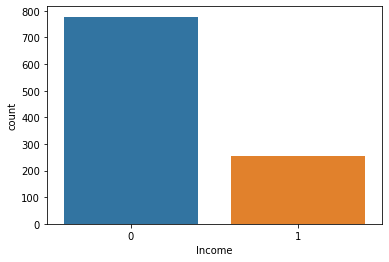

In [30]:
sns.countplot(data=df_new,x="Income")
plt.show()

In [35]:
df_cat.columns

Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

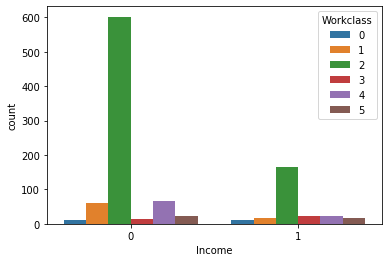

In [36]:
sns.countplot(data=df_new,x="Income",hue="Workclass")
plt.show()

In [37]:
df["Workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc'], dtype=object)

In [ ]:
'''0 - Federal-gov 1-Local-gov  2-Private  3-Self-emp-inc  4-Self-emp-not-inc
5-State-gov '''

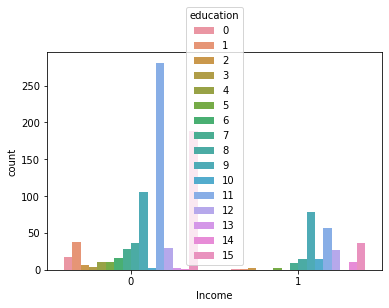

In [38]:
sns.countplot(data=df_new,x="Income",hue="education")
plt.show()

In [40]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [41]:
df_num.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Income'],
      dtype='object')

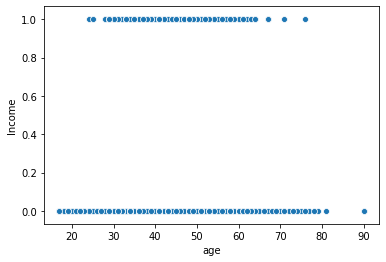

In [43]:
sns.scatterplot(data=df_new,x="age",y="Income")
plt.show()

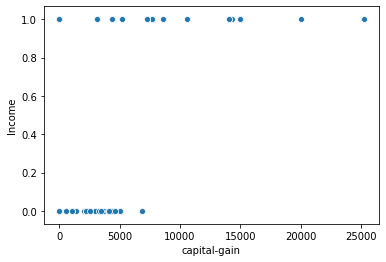

In [44]:
sns.scatterplot(data=df_new,x="capital-gain",y="Income")
plt.show()

In [48]:
X=df_new[["capital-gain","education","Workclass"]] #input [[]]

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt1=DecisionTreeClassifier()

In [60]:
create_model(dt1)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       238
           1       0.54      0.56      0.55        72

    accuracy                           0.79       310
   macro avg       0.70      0.71      0.70       310
weighted avg       0.79      0.79      0.79       310



DecisionTreeClassifier()

In [65]:
dt2=DecisionTreeClassifier(max_depth=8)

In [66]:
create_model(dt2)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       238
           1       0.62      0.61      0.62        72

    accuracy                           0.82       310
   macro avg       0.75      0.75      0.75       310
weighted avg       0.82      0.82      0.82       310



DecisionTreeClassifier(max_depth=8)